In [1]:
%load_ext autoreload
%autoreload 2

import torch

In [2]:
df = torch.load("./../../data/GB1/esm-1b_dataframe.pt")
df = df.sort_values("Fitness_norm", ascending=True)
embedding = torch.stack(tuple(df["Embedding"].values))
fitness = df["Fitness_norm"].values

In [8]:
si = df.loc[df["Variants"] == "VDGV"].index
fi = df.loc[df["Variants"] == "IWGF"].index

In [13]:
embedding = torch.load("./../../data/GB1/esm-1b_embedding.pt")
fitness = torch.load("./../../data/GB1/esm-1b_fitness_norm.pt")

PCA 2D

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pc = pca.fit_transform(embedding)

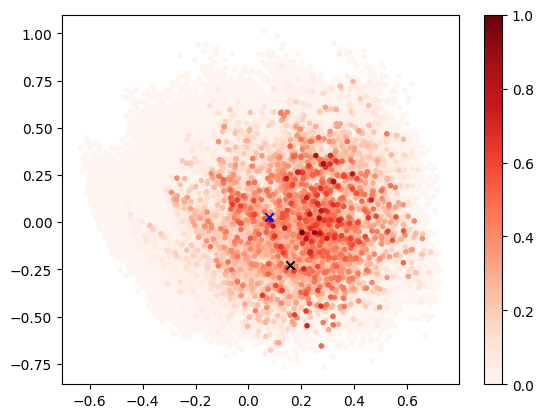

In [24]:
import matplotlib.pyplot as plt

plt.scatter(
    pc[:, 0],
    pc[:, 1],
    marker=".",
    # s=150,
    # linewidths=4,
    c=fitness,
    cmap=plt.cm.Reds,
)
plt.colorbar()

plt.scatter(
    pc[si, 0],
    pc[si, 1],
    marker="x",
    c=[0],
    cmap=plt.cm.gray,
)
plt.scatter(
    pc[fi, 0],
    pc[fi, 1],
    marker="x",
    c=[0],
    cmap=plt.cm.winter,
)


PCA 3D

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)

pc = pca.fit_transform(embedding)

In [49]:
pca.explained_variance_

array([0.05972436, 0.05288601, 0.02339913, 0.01714859, 0.01265054,
       0.01055757, 0.0097067 , 0.00773039, 0.00749952, 0.00662704,
       0.00594283, 0.0052725 , 0.00458017, 0.00431756, 0.00368269,
       0.00324498, 0.00304803, 0.00266584, 0.00216927, 0.00210747])

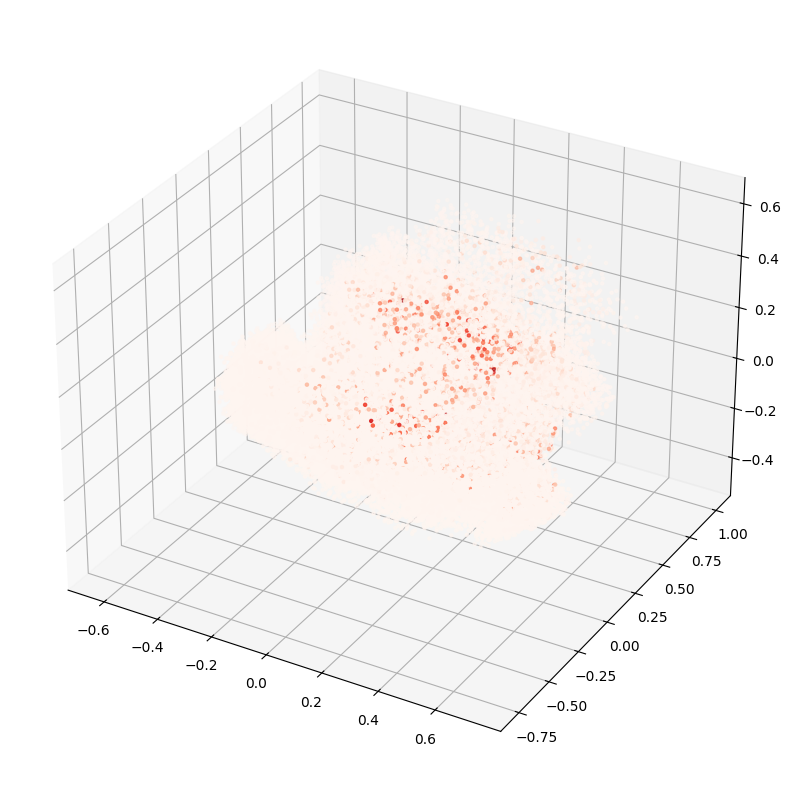

In [54]:
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax.scatter(
    xs=pc[:, 0],
    ys=pc[:, 1],
    zs=pc[:, 2],
    marker=".",
    #s=150,
    #linewidths=4,
    c=fitness,
    cmap=plt.cm.Reds
)

t-SNE

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

tsnec = tsne.fit_transform(embedding)

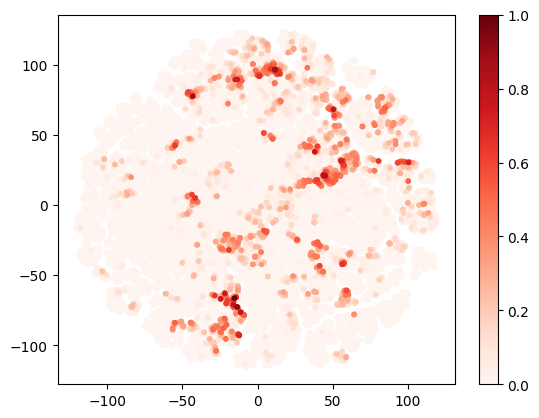

In [34]:
import matplotlib.pyplot as plt

plt.scatter(
    tsnec[:, 0],
    tsnec[:, 1],
    marker=".",
    #s=150,
    #linewidths=4,
    c=fitness,
    cmap=plt.cm.Reds
)
plt.colorbar()